In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpig


1) Use Roberts and Compass edge detection to the uploaded image (1st derivative) .

2) Apply Gaussian smothing with sigma=2.0, and then use second derivative edge detection(Laplacian of Gaussian) 

3) Combine first derivative and second derivative edge detection to compute both edge gradient and orientation(Canny edge detection). 

In robert edge detection pixel values at each point in the output represent the estimated absolute magnitude of the spatial gradient of the input image at that poin

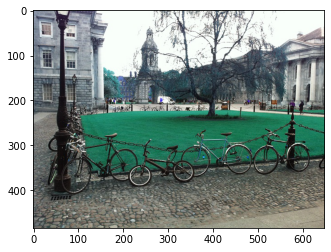

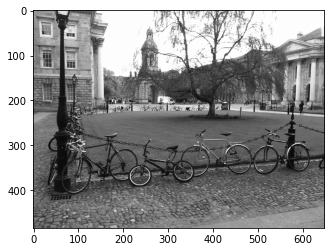

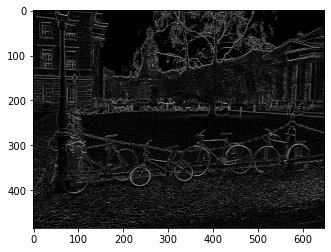

In [44]:
#ROBERT CROSS
#read image 
image = cv2.imread('TrinityBikes.jpg')
img = cv2.imread('TrinityBikes.jpg',0)

kernelx = np.array([[1, 0], [0, -1]])
kernely = np.array([[0, 1], [-1, 0]])
img_robertx = cv2.filter2D(img, -1, kernelx)
img_roberty = cv2.filter2D(img, -1, kernely)
grad = cv2.addWeighted(img_robertx, 1, img_roberty, 1, 0)

plt.imshow(image)
plt.show()

plt.imshow(img,cmap = plt.cm.gray)
plt.show()

plt.imshow(grad,cmap = plt.cm.gray)
plt.show()



Convolution function a way of multiplying together two arrays of numbers, generally of different sizes,here gray scale image and prewitt kernels, to produce a third array of numbers of the same dimensionality. The convolution is performed by sliding the applied kernel over all the pixels of the image.
A is the source image and * denotes the convolution operation.

In [3]:
def convolve(X, F):
    # height and width of the image
    X_height = X.shape[0]
    X_width = X.shape[1]
    
    # height and width of the filter
    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = (F_height - 1) // 2
    W = (F_width - 1) // 2
    
    #output numpy matrix with height and width
    out = np.zeros((X_height, X_width))
    #iterate over all the pixel of image X
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            #iterate over the filter
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    #get the corresponding value from image and filter
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
    #return convolution  
    return out

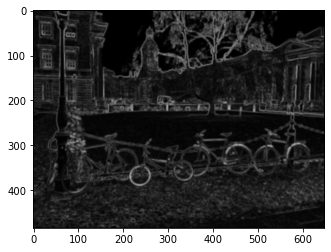

In [4]:
#define horizontal and Vertical sobel kernels
Hx = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
Hy = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

#normalizing the vectors
pre_x = convolve(img, Hx) / 6.0
pre_y = convolve(img, Hy) / 6.0

#calculate the gradient magnitude of vectors
pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
# mapping values from 0 to 255
pre_out = (pre_out / np.max(pre_out)) * 255

#output images
plt.imshow(pre_out, cmap = 'gray', interpolation = 'bicubic')
plt.show()

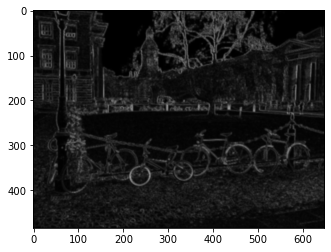

In [7]:

Hx = np.array([[-1, 1, 1],[-1, -2, 1],[-1, 1, 1]])
Hy = np.array([[1, 1, 1],[-1, -2, 1],[-1, -1, +1]])

pre_x = convolve(img, Hx) / 6.0
pre_y = convolve(img, Hy) / 6.0

pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
pre_out = (pre_out / np.max(pre_out)) * 255
plt.imshow(pre_out, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [8]:
kernelx = np.array([[-1, 1, 1],[-1, -2, 1],[-1, 1, 1]])
kernely = np.array([[1, 1, 1],[-1, -2, 1],[-1, -1, +1]])
img_robertx = cv2.filter2D(img, -1, kernelx)
img_roberty = cv2.filter2D(img, -1, kernely)
grad2 = cv2.addWeighted(img_robertx, 1, img_roberty, 1, 0)

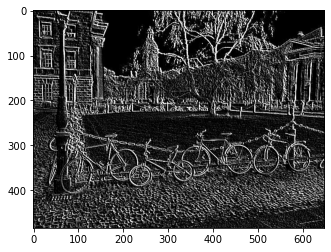

In [39]:
plt.imshow(grad2,cmap = plt.cm.gray)
plt.show()

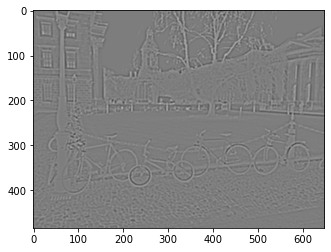

In [20]:
#lAPLASIAN
#apply gaussian blur
blur_img = cv2.GaussianBlur(img, (5, 5),2)
#Laplacian Operator
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)
plt.imshow(laplacian, cmap = 'gray',interpolation = 'bicubic')
plt.show()

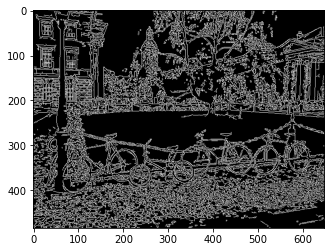

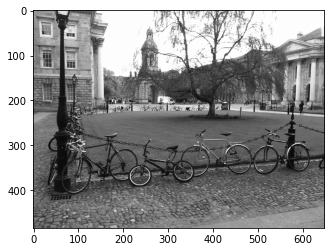

In [45]:
#CANNY
canny_edges = cv2.Canny(img, threshold1=100, threshold2=200)
plt.imshow(canny_edges,cmap = plt.cm.gray)
plt.show()
plt.imshow(img,cmap = plt.cm.gray)
plt.show()